In [30]:
execfile('setting.py')

df = pd.read_csv('보험_대출.csv', encoding='euc-kr')

# 해지율 확인

In [31]:
def CRDT_GRAD_DIFF_CAT(CRDT_GRAD_DIFF):
    if (CRDT_GRAD_DIFF == 0):
        return 0
    elif (CRDT_GRAD_DIFF > 0):
        return 1
    else:
        return -1
    
def CRDT_GRAD_DIFF_CAT2(CRDT_GRAD_DIFF):
    if (CRDT_GRAD_DIFF <= -2):
        return -2
    elif (CRDT_GRAD_DIFF >= 2):
        return 2
    else:
        return CRDT_GRAD_DIFF

In [32]:
df['check1'] = df['CRDT_GRAD_DIFF'].apply(CRDT_GRAD_DIFF_CAT)
df['check2'] = df['CRDT_GRAD_DIFF'].apply(CRDT_GRAD_DIFF_CAT2)

In [33]:
cross = pd.crosstab(index=a['check'], columns=a['TARGET_CANCEL'])
cross1 = pd.crosstab(index=a['check1'], columns=a['TARGET_CANCEL'])
cross2 = pd.crosstab(index=a['check2'], columns=a['TARGET_CANCEL'])

In [34]:
cross

TARGET_CANCEL,0.0,1.0
check,,
-10.0,90,7
-9.0,70,5
-8.0,157,14
-7.0,230,22
-6.0,386,39
-5.0,314,31
-4.0,306,34
-3.0,438,51
-2.0,774,92


In [35]:
cross1

TARGET_CANCEL,0.0,1.0
check1,,
-1,3743,392
0,85887,7748
1,266,26


In [36]:
cross2

TARGET_CANCEL,0.0,1.0
check2,,
-2.0,2765,295
-1.0,978,97
0.0,85887,7748
1.0,200,16
2.0,66,10


In [37]:
chi,p,dof,expected=stats.chi2_contingency(cross)
if(0.05 > p):
    print('chi-square test')
    print('해지 비율 차이가 존재한다.')
else:
    print('해지 비율 차이가 존재하지 않는다.')
print('p-value {}'.format(p))
print('검정통계량 {}'.format(chi))

해지 비율 차이가 존재하지 않는다.
p-value 0.11605388744729811
검정통계량 20.468330809965128


In [38]:
chi,p,dof,expected=stats.chi2_contingency(cross1)
if(0.05 > p):
    print('chi-square test')
    print('해지 비율 차이가 존재한다.')
else:
    print('해지 비율 차이가 존재하지 않는다.')
print(p)

chi-square test
해지 비율 차이가 존재한다.
0.021660003371905993


In [23]:
chi,p,dof,expected=stats.chi2_contingency(cross2)
if(0.05 > p):
    print('chi-square test')
    print('최초신용등급과 최근신용등급간의 변화는 보험 해지 비율 차이가 존재한다.')
else:
    print('해지 비율 차이가 존재하지 않는다.')
print('p_value : {}'.format(p.round(3)))
print('검정통계량 {}'.format(chi.round(3)))

chi-square test
최초신용등급과 최근신용등급간의 변화는 보험 해지 비율 차이가 존재한다.
p_value : 0.0
검정통계량 4701.776


<AxesSubplot:ylabel='Frequency'>

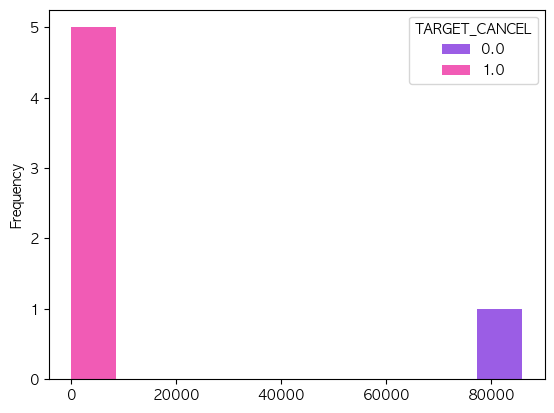

In [11]:
cross2.plot.hist()

In [12]:
cross['rate'] = cross[1] / (cross[0] + cross[1]) * 100

In [13]:
cross1['rate'] = cross1[1] / (cross1[0] + cross1[1]) * 100

In [14]:
cross2['rate'] = cross2[1] / (cross2[0] + cross2[1]) * 100

In [15]:
cross

TARGET_CANCEL,0.0,1.0,rate
check,,,
-10.0,90,7,7.216495
-9.0,70,5,6.666667
-8.0,157,14,8.187135
-7.0,230,22,8.730159
-6.0,386,39,9.176471
-5.0,314,31,8.985507
-4.0,306,34,10.000000
-3.0,438,51,10.429448
-2.0,774,92,10.623557


In [16]:
cross1

TARGET_CANCEL,0.0,1.0,rate
check1,,,
-1,3743,392,9.480048
0,85887,7748,8.274684
1,266,26,8.904110


In [17]:
result = pd.DataFrame({-2:[9.64,2765,295],
                      -1:[9.02,978,97],
                      0:[8.27,85887,7748],
                      1:[7.41,200,16],
                      2:[13.16,66,10]},index=['rate',0,1])
result

,-2,-1,0,1,2
rate,9.64,9.02,8.27,7.41,13.16
0,2765.00,978.00,85887.00,200.00,66.00
1,295.00,97.00,7748.00,16.00,10.00


In [18]:
cross2.T.round(2)

check2,-2.0,-1.0,0.0,1.0,2.0
TARGET_CANCEL,,,,,
0.0,2765.00,978.00,85887.00,200.00,66.00
1.0,295.00,97.00,7748.00,16.00,10.00
rate,9.64,9.02,8.27,7.41,13.16


In [19]:
print(2600/292)

8.904109589041095


<AxesSubplot:xlabel='check2'>

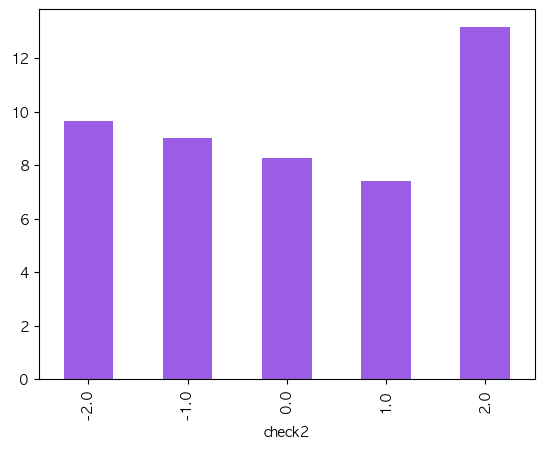

In [20]:
cross2['rate'].plot.bar()